Modelos Asociativos y Aprendizaje Hebbiano
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/deep-neural-nets/tree/master/) para acceder al repositorio online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/deep-neural-nets/tree/master/) para explorar el repositorio usando `nbviewer`. 

---

# Definición del problema

Se contruyó un sistema de transmisión que permite enviar información entre dos puntos diferentes. Por simplicidad se supondrá que solo es de interés transmitir tres patrones diferentes, los cuales son presentados en la figura de abajo. El problema radica en que en el punto de recepción, el patrón recibido puede llegar incompleto o contaminado con ruido. Se desea construir un sistema que permita recuperar el patrón original a partir del patrón recibido.  

![alt](images/ModelosAsociativos-01.png)

# Metodología de Solución

Este problema puede ser solucionado mediante una memoria lineal asociativa, la cual relaciona un patrón de actividad neuronal de entrada  con un patrón de actividad neuronal de salida. Existen dos fases:

* Aprendizaje: Un patrón clave es presentado como un estímulo. La memoria lo transforma a un patrón almacenado o memorizado.


![alt](images/ModelosAsociativos-02.png)

* Uso: Se presenta una versión del patrón de entrada incompleta o con ruido y la memoria devuelve el patrón almacenado más parecido.

![alt](images/ModelosAsociativos-03.png)

Las características de la memoria asociativa son las siguientes:


* La memoria es distribuida.


* Los patrones de estímulo y las respuestas son vectores de datos.


* La información se almacena en las neuronas a través de un patrón de actividad neural a través de un gran número de neuronas.


* La información contenida en el estímulo determina su localización de almacenamiento en la memoria y la dirección para su recuperación.


* La memoria tiene un alto grado de resistencia al ruido.


* Las interacciones entre patrones son almacenadas en la memoria.


Conceptualmente se reconocen dos tipos de asociación:

* Autoasociación: El estímulo es asociado consigo mismo en la memoria.

![alt](images/ModelosAsociativos-04.png)

* Heteroasociación: Vectores arbitrarios de estímulos son asociados con vectores arbitrarios de respuesta.

![alt](images/ModelosAsociativos-02.png)


Hay dos tipos de memorias:

* Memoria asociativa lineal: la neurona actúa como un combinador lineal: 
$$\mathbf{b}=\mathbf{Ma}$$
Donde $\mathbf{M}$ es la matriz de memoria, $\mathbf{a}$ el estímulo, y $\mathbf{b}$ la respuesta


* Memoria asociativa no lineal: 
$$\mathbf{b}=\Phi(\mathbf{M},\mathbf{a})$$
en la que $\Phi(.)$ es una función no lineal.


### Solución mediante una memoria asociativa lineal

Una memoria asociativa lineal puede representarse como la siguiente red neuronal:

![alt](images/ModelosAsociativos-05.png)

donde:

* El $k$-ésimo estímulo o patrón clave es $\mathbf{a}_k = [a_{k1}, ..., a_{km}]^T$.


* El $k$-ésimo vector respuesta o patrón memorizado es $\mathbf{b}_k = [b_{k1}, ..., b_{kn}]$.


* La red asocia $\mathbf{a}_k$ con $\mathbf{b}_k$, esto es $\mathbf{a}_k \, \to \, \mathbf{b}_k$ como:

$$\mathbf{b}_k = \mathbf{M} \mathbf{a}_k$$

Para $Q$ patrones a asociar, la matriz $\mathbf{M}$ se calcula como:

$$\mathbf{M} = \sum_{k=1}^Q \mathbf{b}_k \mathbf{a}_k^T 
= [\mathbf{b}_1 ... \mathbf{b}_Q] 
 \begin{bmatrix} \mathbf{a}_1^T  \\ \vdots \\ \mathbf{a}_Q^T\end{bmatrix} 
= \mathbf{B} \mathbf{A}^T
$$

donde $\mathbf{A}$ es la matriz clave y $\mathbf{B}$ es la matriz memorizada.

**Propagación de la señal.** Cuando se presenta un estímulo $\mathbf{a}_j$ la respuesta será:

$$\mathbf{b} = 
\mathbf{M} \mathbf{a_j} = 
\sum_{k=1}^Q \mathbf{b}_k \mathbf{a}_k^T \mathbf{a}_j =
\sum_{k=1}^Q (\mathbf{a}_k^T \mathbf{a}_j) \mathbf{b}_k  =
(\mathbf{a}_j^T \mathbf{a}_j) \mathbf{b}_j + 
\sum_{\substack{k=1\\k \neq j}}^Q (\mathbf{a}_k^T \mathbf{a}_j) \mathbf{b}_k
$$

Ya que la red neuronal reproduce perfectamente la salida deseada $\mathbf{b}_j$, entonces:

* Cada patrón de entrada debe estar normalizado $\mathbf{a}_j^T \mathbf{a}_j = 1$.


* Los patrones de entrada deben ser ortogonales:
$$
\mathbf{a}_k^T \mathbf{a}_j = 
\begin{cases}
1, & k = j \\
0, & k \ne j
\end{cases}
$$

Y $Q$ debe ser menor que la dimensión de las claves.

---
**Ejercicio.--** Construya la matriz $\mathbf{M}$ para los siguientes patrones de entrenamiento (realice los cálculos usando `numpy`):

* $\mathbf{a}_1 = [+0.5, -0.5, +0.5, -0.5]^T$, $\mathbf{b}_1 = [+1, -1]^T$.


* $\mathbf{a}_2 = [+0.5, +0.5, -0.5, -0.5]^T$, $\mathbf{b}_2 = [+1, +1]^T$.


---

**Método de la pseudoinversa.** En este caso, los vectores de es:

$$\mathbf{b} = 
\mathbf{M} \mathbf{a_j} = 
(\mathbf{a}_j^T \mathbf{a}_j) \mathbf{b}_j + 
\sum_{\substack{k=1\\k \neq j}}^Q (\mathbf{a}_k^T \mathbf{a}_j) \mathbf{b}_k = 
\mathbf{b}_j + 
\sum_{\substack{k=1\\k \neq j}}^Q (\mathbf{a}_k^T \mathbf{a}_j) \mathbf{b}_k =
\mathbf{b}_j+ \mathbf{v}_j
$$

donde $\mathbf{b}_j$ es la respuesta deseada y $\mathbf{v}_j$ es un vector de ruido, con:

$$\mathbf{v}_j 
= \sum_{\substack{k=1\\k \neq j}}^Q (\mathbf{a}_k^T \mathbf{a}_j) \mathbf{b}_k 
= \sum_{\substack{k=1\\k \neq j}}^Q \cos (\mathbf{a}_k, \mathbf{a_j}) \mathbf{b}_k 
$$

Se puede minimizar el error cuando los patrones no son ortogonales aplicando la regla de la pseudoinversa.

* Se tienen $Q$ patrones de entrenamiento, con $Q>m$.


* Es posible definir una medida del error, tal como la suma de errores al cuadrado:
$$
J(\mathbf{M}) 
= \sum_{k=1}^Q \| \mathbf{b}_k - \mathbf{Ma}_k) \|^2
= \| \mathbf{B} - \mathbf{MA} \|^2
= \| \mathbf{E} \|^2
$$


* Derivando e igualando a cero:

$$ \mathbf{B} - \mathbf{MA} = 0 $$

$$ \mathbf{MA} = \mathbf{B} $$

$$ \mathbf{M} = \mathbf{B} \mathbf{A} ^{-1}$$


* Ya que $\mathbf{A}$ es una matriz rectangular, su inversa exacta no existe. Se recurre a la definición de psuedoinversa. 

$$ \mathbf{M} = \mathbf{B} \mathbf{A} ^{+}$$

$$ \mathbf{A}^{+} = (\mathbf{A}^T \mathbf{A})^{-1} \mathbf{A}^T $$

**Solución al problema propuesto.** Para el problema propuesto en este tutorial, se tienen tres  patrones de entrenamento, los cuales serán aprendidos por una red neuronal asociativa NO lineal. Este tipo de red neuronal se construye usando una memoria asociativa lineal en la que se cambia la función de activación. La arquitectura del modelo es la siguiente:

![alt](images/ModelosAsociativos-06.png)

Las figuras son representadas mediante patrones binarios, $\{-1, +1\}$, donde $-1$ representa el blanco y $+1$ representa el negro.

### Solucion usando `numpy`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def plot_digits(x, y=None):
    """
    Genera el gráfico de patrones por parejas.
    
    x: lista con los patrones iniciales
    y: lista con los patrones limpios
    """
    N = len(x)
    if y is None:
        fig, axes = plt.subplots(1, N, figsize=(2.9, 1.2))
        for i, data in enumerate(x):
            axes[i].pcolor(data, edgecolors='grey', linewidths=1, cmap=plt.get_cmap('Greys'))
            axes[i].set(xticks=[], yticks=[])
    else:
        if N == 1:
            fig, axes = plt.subplots(N, 2, figsize=(2.0, 1.2))
            axes[0].pcolor(x[0], edgecolors='grey', linewidths=1, cmap=plt.get_cmap('Greys'))
            axes[1].pcolor(y[0], edgecolors='grey', linewidths=1, cmap=plt.get_cmap('Greys'))
            axes[0].set(xticks=[], yticks=[])
            axes[1].set(xticks=[], yticks=[])
        else:
            fig, axes = plt.subplots(N, 2, figsize=(2, 3))
            for i, (data_x, data_y) in enumerate(zip(x,y)):
                axes[i][0].pcolor(data_x, edgecolors='grey', linewidths=1, cmap=plt.get_cmap('Greys'))
                axes[i][1].pcolor(data_y, edgecolors='grey', linewidths=1, cmap=plt.get_cmap('Greys'))
                axes[i][0].set(xticks=[], yticks=[])
                axes[i][1].set(xticks=[], yticks=[])
    fig.tight_layout()
    plt.show()


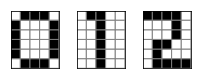

In [3]:
##
## Se representan los tres patrones como matrices
## Note que las matrices estan invertidas para
## efectos de graficacion
## -1: blanco,  +1: negro
##

d0 = np.array([[-1, +1, +1, +1, -1],
               [+1, -1, -1, -1, +1],
               [+1, -1, -1, -1, +1],
               [+1, -1, -1, -1, +1],
               [+1, -1, -1, -1, +1],
               [-1, +1, +1, +1, -1]])

d1 = np.array([[-1, -1, +1, -1, -1],
               [-1, -1, +1, -1, -1],
               [-1, -1, +1, -1, -1],
               [-1, -1, +1, -1, -1],
               [-1, -1, +1, -1, -1],
               [-1, +1, +1, -1, -1]])

d2 = np.array([[-1, +1, +1, +1, +1],
               [-1, +1, -1, -1, -1],
               [-1, +1, +1, -1, -1],
               [-1, -1, -1, +1, -1],
               [-1, -1, -1, +1, -1],
               [+1, +1, +1, +1, -1]])

plot_digits(x=[d0, d1, d2])

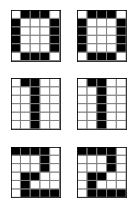

In [4]:
class ALM:
    def __init__(self):
        self.M = None
        
    def fit(self, x):
        ##
        ## Recibe una lista de matrices con los patrones
        ##
        x = [e.flatten() for e in x]            ## matrix a vector
        x = (e.reshape(len(e), 1) for e in x)   ## vector-fila a vector-columna
        A = np.hstack(x)                        ## matriz A = [x0 x1 x2]
        self.M = A @ np.linalg.pinv(A)          ## B * inv(At * A)
        
    def predict(self, x):
        ##
        ## x es una lista de matrices
        ##
        m, n = x[0].shape
        x = [e.flatten() for e in x]            ## matrix a vector
        x = (e.reshape(len(e), 1) for e in x)   ## vector-fila a vector-columna
        x = [self.M @ e for e in x]
        x = [e.reshape(m,n) for e in x]
        return x

alm = ALM()
alm.fit([d0, d1, d2])
n = alm.predict([d0, d1, d2])
plot_digits(x=[d0, d1, d2], y=n)

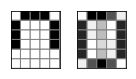

In [5]:
##
## Se ejecuta el modelo sobre patrones incompletos
## o contaminados con ruido
##
n0 = np.array([[-1, -1, -1, -1, -1],
               [-1, -1, -1, -1, -1],
               [+1, -1, -1, -1, +1],
               [+1, -1, -1, -1, +1],
               [+1, -1, -1, -1, +1],
               [-1, +1, +1, +1, -1]])

plot_digits(x=[n0], y=alm.predict([n0]))

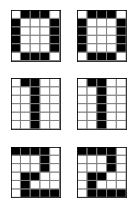

In [6]:
##
## Ya que se requiere que la salida sea {-1, +1}
## se modifica el codigo anterior agregando la
## función de activación de paso duro
##
class ANLM:
    def __init__(self):
        self.M = None
        
    def fit(self, x):
        x = [e.flatten() for e in x]            ## matrix a vector
        x = (e.reshape(len(e), 1) for e in x)   ## vector-fila a vector-columna
        A = np.hstack(x)                        ## matriz A = [x0 x1 x2]
        self.M = A @ np.linalg.pinv(A)          ## B * inv(At * A)
        
    def predict(self, x):
        m, n = x[0].shape
        x = [e.flatten() for e in x]            ## matrix a vector
        x = (e.reshape(len(e), 1) for e in x)   ## vector-fila a vector-columna
        x = [self.M @ e for e in x]
        ##
        ## ----- función de activación -------
        ##
        x = [np.sign(e) for e in x]
        ##
        ## ------------------------------------
        ##
        x = [e.reshape(m,n) for e in x]
        return x

anlm = ANLM()
anlm.fit([d0, d1, d2])
n = anlm.predict([d0, d1, d2])
plot_digits(x=[d0, d1, d2], y=n)

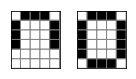

In [7]:
##
## Se ejecuta el modelo sobre patrones incompletos
## o contaminados con ruido
##
n0 = np.array([[-1, -1, -1, -1, -1],
               [-1, -1, -1, -1, -1],
               [+1, -1, -1, -1, +1],
               [+1, -1, -1, -1, +1],
               [+1, -1, -1, -1, +1],
               [-1, +1, +1, +1, -1]])

plot_digits(x=[n0], y=anlm.predict([n0]))

---
**Ejercicio.--** Verifique si las siguientes reconstrucciones son correctas.

![alt](images/ModelosAsociativos-07.png)



---
**Ejercicio.--** Implemente el algoritmo anterior usando las operaciones elementales de `TensorFlow` y con compare los resultados obtenidos usando `numpy`.

---

### Solución mediante una memoria asociativa bidireccional (BAM)

Es una memoria asociativa lineal donde la señal se propaga de una capa a otra (retropropagación) hasta estabilizarse (la salida de la red se hace estable). El modelo esquemático es el siguiente:

![alt](images/ModelosAsociativos-08.png)

A continuación se ejemplifica el proceso de propagación de una señal a través de la BAM. El $k$-ésimo patrón, $\mathbf{a}_k(1)$, es patrón $\mathbf{a}_k$ en la iteración 1; entonces, la propagación de la señal se realiza de la siguiente manera:

* $\mathbf{b}_k(1) = \text{sign}(\mathbf{M} \, \mathbf{a}_k(1))$


* $\mathbf{a}_k(2) = \text{sign}(\mathbf{M}^T \, \mathbf{b}_k(1))$


* Y así sucesivamente hasta que $\mathbf{b}_k(t+1) = \mathbf{b}_k(t)$ y $\mathbf{a}_k(t+1) = \mathbf{a}_k(t)$ 

La matriz $\mathbf{M}$ se calcula como:

$$\mathbf{M} = \sum_{k=1}^Q \textbf{b}_k \mathbf{a}_k^T$$

---
**Ejercicio.--** Implemente una BAM usando `TensorFlow`. Verifique la reconstrucción de los patrones incompletos y contaminados con ruído.

---

### Solución mediante una red discreta de Hopfield

Para una matriz lineal auto-asociativa, los coeficientes se calculan como:

$$\mathbf{M} = \sum_{k=1}^Q \mathbf{a}_k \mathbf{a}_K^T$$

La red discreta de Hopfield se obtiene al unir los nodos de entrada y salida en una sola capa:

![alt](images/ModelosAsociativos-09.png)

Este tipo de red neuronal tiene las siguientes características:

* La función de activación de las neuronas es $f(u)=\text{sign}⁡(u)$.


* Los elementos de los vectores a asociar son bipolares.


* Los pesos de las conexiones se calculan como:

$$m_{i,j} = \frac{1}{P} \sum_{p=1}^P (a_{p,i} * a_{p,j})$$


* 	Los nodos toman valores $\{-1,+1\}$.


La propagación de la señal puede ser sincrónica o asincrónica.

* Prograpación asincrónica: cuando un patrón es presentado, el valor de un solo nodo es actualizado en cada instante de tiempo hasta que la red se estabiliza.
$$
x_{p,i}(t+1)=
\begin{cases}
x_{p,i}(t),         & \text{if } i = k \\
\text{sign} 
\left(  
\sum_i^n w_{i,j} \cdot  x_{p,j}(t) + I_{p,i}
\right), & \text{if } i \ne k
\end{cases}
$$

  - $x_{p,i}$ representa el estado actual de la neurona $i$ cuando se presentó el patrón $p$
  
  - $I_{p,i}$ es la entrada externa a la neurona $i$ para el patrón $p$ en el instante actual.


* Propagación sincrónica:
$$
x_{p,i}(t+1)=
\text{sign} 
\left(  
\sum_i^n w_{i,j} \cdot  x_{p,j}(t) + I_{p,i}
\right)
$$



---
**Ejercicio.--** Calcule los pesos de los nodos de una red discreta de Hoptfield para los patrones $[(+1,+1,+1),(-1,-1,-1),(+1,-1,-1)]$

---

**Ejercicio.--** Realice la propagación sincrónica de los siguientes patrones suponiendo que los pesos se actualizan secuencialmente.

* $(+1,+1,-1)$


* $(-1,+1,+1)$


* $(0,0,+1)$

---

**Ejercicio.--** Implemente el algoritmo en `TensorFlow`.

---

### Brain-state-in-a-Box

Es similar a una memoria discreta de Hopfield con las siguientes variaciones:


* La función de activación de las neuronas es $f(u)=\min⁡(1,\max⁡(-1,u))$.


* Todos los nodos son actualizados simultáneamente


* Los nodos toman valores en el intervalo $[-1,+1]$.

	
* Los patrones a asociar son bipolares.
    

* Los pesos de las conexiones se calculan como:


$$m_{i,j}=\frac{1}{P} \sum_{p=1}^P \left( a_{p,i} \cdot a_{p,j} \right) $$


---
**Ejercicio.--** Calcule los pesos de los nodos para los patrones $[(+1,+1,+1),(-1,-1,-1),(+1,-1,-1)]$

---

**Ejercicio.--** Realice la propagación del patrón de entrada $(0.5, 0.6, 0.1)$ hasta que la red se estabilice.

---
**Ejercicio.--** Implemente el algoritmo en `TensorFlow`.

---

Modelos Asociativos y Aprendizaje Hebbiano
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/deep-neural-nets/tree/master/) para acceder al repositorio online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/deep-neural-nets/tree/master/) para explorar el repositorio usando `nbviewer`. 